In [1]:
import pandas as pd


train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

# Not use 'ID' column.
x_train = train.filter(regex='X')
y_train = train.filter(regex='Y')

In [2]:
x_train

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [3]:
y_train

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,1.382,1.215,1.263,10.874,29.194,16.582,3.410,-26.486,-26.581,-22.772,24.261,-26.491,-26.584,-26.580
39603,1.482,0.606,1.083,8.759,29.859,15.659,3.406,-27.308,-27.203,-24.674,23.427,-27.250,-27.334,-27.325
39604,1.117,1.154,0.993,13.159,24.720,16.823,3.215,-26.502,-26.687,-22.577,24.301,-26.388,-26.425,-26.601
39605,0.895,0.187,0.477,9.123,26.412,15.757,4.216,-26.760,-26.634,-24.066,23.305,-26.536,-26.751,-26.635


# Missing values

<AxesSubplot:title={'center':'y_train'}>

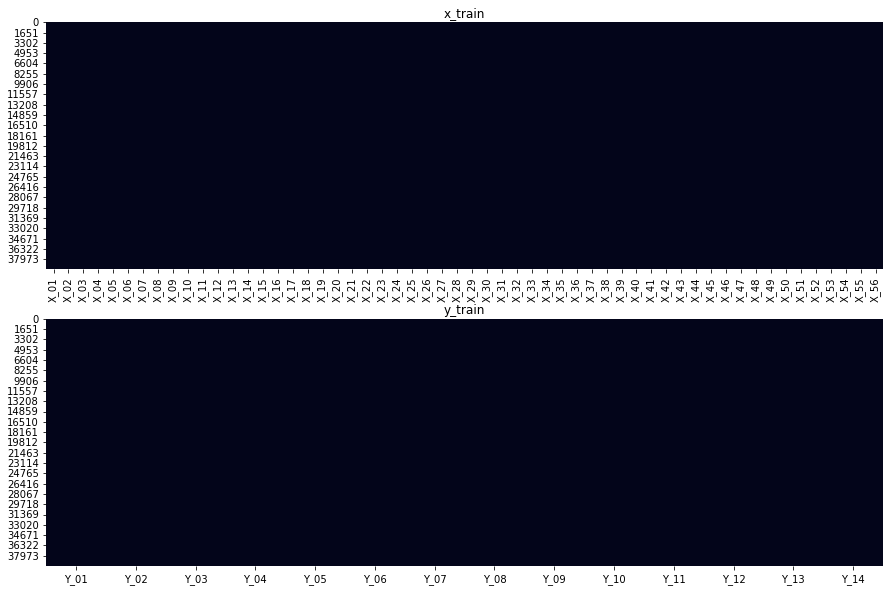

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))

ax = plt.subplot(2,1,1)
plt.title('x_train') 
sns.heatmap(x_train.isnull(), cbar=False)

ax = plt.subplot(2,1,2)
plt.title('y_train')
sns.heatmap(y_train.isnull(), cbar=False)

# Group features by each name

In [5]:
x_info = pd.read_csv('../dataset/meta/x_feature_info.csv')
y_info = pd.read_csv('../dataset/meta/y_feature_info.csv')

In [6]:
x_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [7]:
y_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [8]:
def make_namegroup(df, info):
    import re, collections
    
    namegroup = collections.defaultdict(list)
    info = info.set_index('Feature').T.to_dict('list')
    for feature in info:
        name = ' '.join(re.sub(r'[0-9]','n',*info[feature]).split())
        namegroup[name].append(feature)
    
    return namegroup

In [9]:
x_name = make_namegroup(x_train, x_info)
x_name

defaultdict(list,
            {'PCB 체결 시 단계별 누름량(Step n)': ['X_01', 'X_02', 'X_05', 'X_06'],
             '방열 재료 n 무게': ['X_03', 'X_10', 'X_11'],
             'n차 검사 통과 여부': ['X_04', 'X_23', 'X_47', 'X_48'],
             '방열 재료 n 면적': ['X_07', 'X_08', 'X_09'],
             '커넥터 위치 기준 좌표': ['X_12'],
             '각 안테나 패드 위치(높이) 차이': ['X_13'],
             'n번 안테나 패드 위치': ['X_14', 'X_15', 'X_16', 'X_17', 'X_18'],
             'n번 스크류 삽입 깊이': ['X_19', 'X_20', 'X_21', 'X_22'],
             '커넥터 n번 핀 치수': ['X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29'],
             '스크류 삽입 깊이n': ['X_30', 'X_31', 'X_32', 'X_33'],
             '스크류 체결 시 분당 회전수 n': ['X_34', 'X_35', 'X_36', 'X_37'],
             '하우징 PCB 안착부 n 치수': ['X_38', 'X_39', 'X_40'],
             '레이돔 치수 (안테나 n번 부위)': ['X_41', 'X_42', 'X_43', 'X_44'],
             '안테나 부분 레이돔 기울기': ['X_45'],
             '실란트 본드 소요량': ['X_46'],
             'Cal 투입 전 대기 시간': ['X_49'],
             'RFn 부분 SMT 납 량': ['X_50',
              'X_51',
     

In [10]:
y_name = make_namegroup(y_train, y_info)
y_name

defaultdict(list,
            {'안테나 Gain 평균 (각도n)': ['Y_01', 'Y_05', 'Y_07', 'Y_11'],
             '안테나 n Gain 편차': ['Y_02', 'Y_03'],
             '평균 신호대 잡음비': ['Y_04'],
             '신호대 잡음비 (각도n)': ['Y_06',
              'Y_08',
              'Y_09',
              'Y_10',
              'Y_12',
              'Y_13',
              'Y_14']})

In [11]:
def create_group_csvs(df, namegroup, save_route):
    import os
    for name in namegroup:
        tmp = pd.DataFrame()
        for feature in namegroup[name]:
            tmp[feature] = df[feature].copy()
        os.makedirs(f"{save_route}", exist_ok=True)
        tmp.to_csv(f"{save_route}/{name}.csv", index=False)


def make_dataframe(df, namegroup, feature):
    tmp = pd.DataFrame()
    for feature in namegroup[name]:
        tmp[feature] = df[feature].copy()
    return tmp
        

create_group_csvs(x_train, x_name, '../dataset/x_feature')
create_group_csvs(y_train, y_name, '../dataset/y_feature')